## **Milestone 2 -  Customizing Graph-structured AutoML Pipeline** 

Based on notebook from Xiaotian Han

Implement the an automated deep learning model for image classification using the Funtional API of AutoKeras. The step is listed as follows:

1. Load and prepare cifar10 dataset
3. Build the graph-structured deep learning model
3. Explore the searched model

In [ ]:
%%capture
!pip install tensorflow==2.5.0
!pip install autokeras==1.0.16

In [1]:
# import the python packages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
import keras_tuner.engine.hyperparameters as hp
tf.random.set_seed(42)
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Layer, Dense, ReLU, Softmax, MaxPooling2D, Flatten, Conv2D

import autokeras as ak

print( "tf.__version__:", tf.__version__ )
print( "ak.__version__:", ak.__version__ )

tf.__version__: 2.5.0
ak.__version__: 1.0.16


## Load dataset

In [4]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Training image shape:', x_train.shape)
print('Training label shape:', y_train.shape)
print('Testing image shape:', x_test.shape)
print('Testing label shape:', y_test.shape)

Training image shape: (50000, 32, 32, 3)
Training label shape: (50000, 1)
Testing image shape: (10000, 32, 32, 3)
Testing label shape: (10000, 1)


#### Load cifar10 dataset

(-0.5, 31.5, 31.5, -0.5)

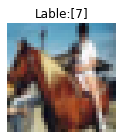

In [7]:
(x_train, y_train), (x_test, y_test) =  cifar10.load_data()

from sklearn.utils import resample
x_train, y_train = resample(x_train, y_train, n_samples=10000, replace=False, random_state=0)

image = x_train[0]
label = y_train[0]

# The normal figure
plt.figure( figsize=(2,2) )
plt.tight_layout()
plt.imshow(x_train[0].reshape(32,32,3), interpolation='none')
plt.title("Lable:{}".format(y_train[0]))
plt.axis('off')

#### Prepare data

In [11]:
# scale
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# reshape
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
print('Training image shape:', x_train.shape)
print('Training label shape:', y_train.shape)
print('Testing image shape:', x_test.shape)
print('Testing label shape:', y_test.shape)

Training image shape: (10000, 32, 32, 3)
Training label shape: (10000, 1)
Testing image shape: (10000, 32, 32, 3)
Testing label shape: (10000, 1)


## Build the graph-structured deep learning model

#### Build model with Functional API

In [26]:
inputs = ak.ImageInput()

# Build a graph-structured AutoML pipeline
# Your code here

# Branch 1
branch1 = ak.Normalization()(inputs)
branch1 = ak.ImageAugmentation()(branch1)
branch1_outputs = ak.ConvBlock(hp.Choice('num_blocks', values=[2]),
                        hp.Choice('num_layers', values=[1]))(branch1)

# Branch 2
branch2 = ak.Normalization()(inputs)
branch2 = ak.ImageAugmentation()(branch2)
branch2 = ak.ConvBlock(hp.Choice('num_blocks', values=[2]),
                    hp.Choice('num_layers', values=[1]))(branch2)

# Subbranch 1 of branch 2
branch2_1 = ak.Normalization()(branch2)
branch2_1 = ak.ConvBlock(hp.Choice('num_blocks', values=[2]),
                    hp.Choice('num_layers', values=[1]))(branch2_1)

# Subbranch 2 of branch 2
# Your code here
branch2_2 = ak.Normalization()(branch2)
branch2_2 = ak.ConvBlock(hp.Choice('num_blocks', values=[2]),
                    hp.Choice('num_layer', values=[1]))(branch2_2)

# Merge subbranch 1 and 2
branch2_outputs = ak.Merge()([branch2_1, branch2_2])

# Merge branch 1 and 2
outputs = ak.Merge()([branch1_outputs, branch2_outputs])

outputs = ak.ClassificationHead()(outputs)

# Your code here

#### Train model

In [34]:
clf = ak.AutoModel(
    inputs=inputs, 
    outputs=outputs,
    max_trials=10,
    overwrite=True,
    seed=42)

In [42]:
clf.fit(x_train, y_train, epochs=10)

Trial 10 Complete [00h 00m 51s]
val_loss: 1.1774393320083618

Best val_loss So Far: 1.0579932928085327
Total elapsed time: 00h 08m 49s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
313/313 [==============================] - 4s 10ms/step - loss: 1.8236 - accuracy: 0.3898
Epoch 2/10
313/313 [==============================] - 3s 9ms/step - loss: 1.4200 - accuracy: 0.4936
Epoch 3/10
313/313 [==============================] - 3s 9ms/step - loss: 1.3004 - accuracy: 0.5359
Epoch 4/10
313/313 [==============================] - 3s 9ms/step - loss: 1.2106 - accuracy: 0.5713
Epoch 5/10
313/313 [==============================] - 3s 9ms/step - loss: 1.1393 - accuracy: 0.5974
Epoch 6/10
313/313 [==============================] - 3s 9ms/step - loss: 1.0857 - accuracy: 0.6204
Epoch 7/10
313/313 [==============================] - 3s 9ms/step - loss: 1.0517 - accuracy: 0.6325
Epoch 8/10
313/313 [==============================] - 3s 9ms/step - loss: 1.0199 - accuracy: 0.6384
Epoch 9/10
313/313 [======

## Explore Model

In [50]:
# Get the summarized results during the tuning process (return the best 10 models if existed)
clf.tuner.results_summary()

Results summary
Results in .\auto_model
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
image_augmentation_1/translation_factor: 0.1
image_augmentation_1/horizontal_flip: True
image_augmentation_1/vertical_flip: False
image_augmentation_1/rotation_factor: 0.0
image_augmentation_1/zoom_factor: 0.0
image_augmentation_1/contrast_factor: 0.0
image_augmentation_2/translation_factor: 0.1
image_augmentation_2/horizontal_flip: True
image_augmentation_2/vertical_flip: False
image_augmentation_2/rotation_factor: 0.0
image_augmentation_2/zoom_factor: 0.0
image_augmentation_2/contrast_factor: 0.0
conv_block_1/num_blocks: 2
conv_block_1/separable: False
conv_block_1/max_pooling: True
conv_block_1/dropout: 0.5
conv_block_1/num_layers: 1
conv_block_1/filters_0_0: 32
conv_block_2/num_blocks: 2
conv_block_2/separable: False
conv_block_2/max_pooling: True
conv_block_2/dropout: 0
conv_block_2/num_layers: 1
conv_block_2/filters_0_0: 32
conv_block_3/num_blo

In [58]:
#Retrieve best model
best_model = clf.export_model()
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
cast_to_float32 (CastToFloat32) (None, 32, 32, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 32, 32, 3)    7           cast_to_float32[0][0]            
__________________________________________________________________________________________________
random_translation_1 (RandomTra (None, 32, 32, 3)    0           normalization_1[0][0]            
______________________________________________________________________________________________

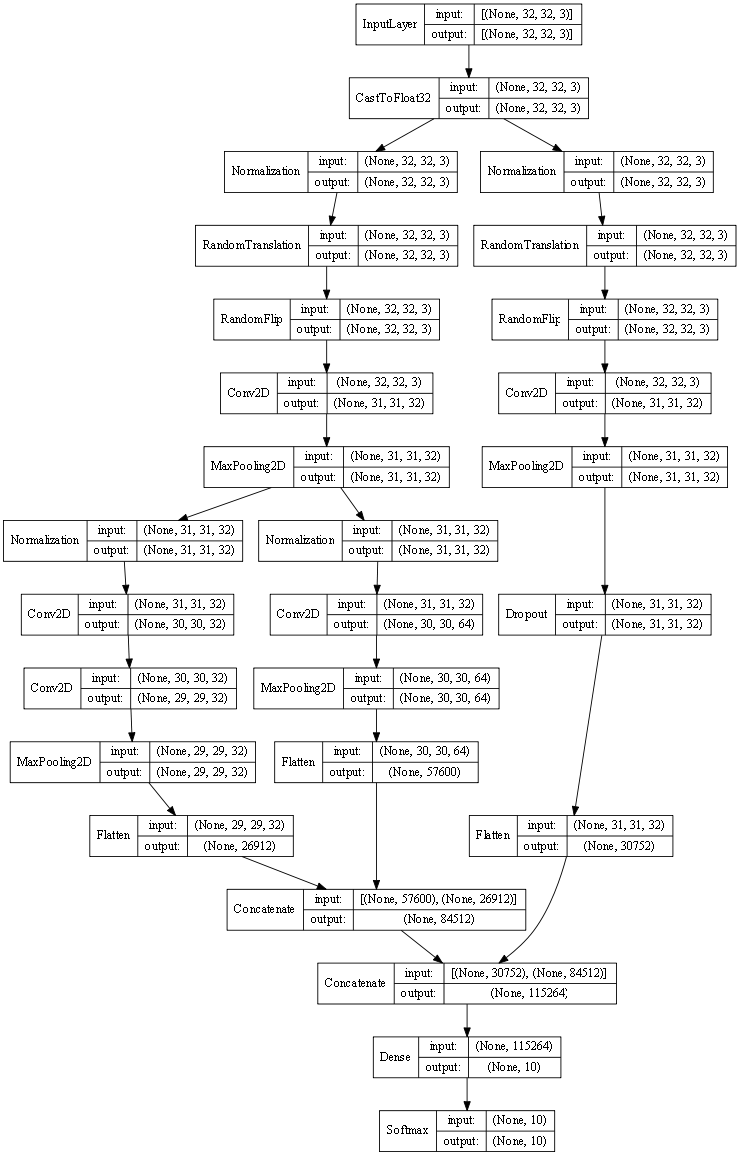

In [66]:
# Converts a Keras model to dot format and plot an image
tf.keras.utils.plot_model(best_model, show_layer_names=False, show_shapes=True, expand_nested=True, dpi=64)

## Retrain and evaluate searched model

In [74]:
(x_train, y_train), (x_test, y_test) =  cifar10.load_data()
# scale
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# reshape
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
print('Training image shape:', x_train.shape)
print('Training label shape:', y_train.shape)
print('Testing image shape:', x_test.shape)
print('Testing label shape:', y_test.shape)

# compile the model and train the model
best_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
best_model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.20)

Training image shape: (50000, 32, 32, 3)
Training label shape: (50000, 1)
Testing image shape: (10000, 32, 32, 3)
Testing label shape: (10000, 1)
Epoch 1/20
625/625 [==============================] - 9s 10ms/step - loss: 1.0091 - accuracy: 0.6503 - val_loss: 0.9570 - val_accuracy: 0.6796
Epoch 2/20
625/625 [==============================] - 6s 10ms/step - loss: 0.9494 - accuracy: 0.6688 - val_loss: 0.8963 - val_accuracy: 0.7004
Epoch 3/20
625/625 [==============================] - 7s 11ms/step - loss: 0.9098 - accuracy: 0.6812 - val_loss: 0.9262 - val_accuracy: 0.6842
Epoch 4/20
625/625 [==============================] - 6s 10ms/step - loss: 0.8837 - accuracy: 0.6948 - val_loss: 0.8613 - val_accuracy: 0.7067
Epoch 5/20
625/625 [==============================] - 6s 10ms/step - loss: 0.8626 - accuracy: 0.6999 - val_loss: 0.8651 - val_accuracy: 0.7138
Epoch 6/20
625/625 [==============================] - 6s 10ms/step - loss: 0.8400 - accuracy: 0.7106 - val_loss: 0.8770 - val_accuracy: 0.7

#### Evaluate the searched model

In [75]:
# evaluate the model
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=1)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.7829 - accuracy: 0.7431
Test loss:  0.7829476594924927
Test accuracy:  0.7430999875068665


Using the same dataset and the same number of epochs, the current model performed better than the previous model.